In [1]:
import numpy as np
import pandas as pd

import dabl

import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import warnings
warnings.filterwarnings("ignore")

## Reading the data

In [3]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
print(df.shape)
print(df.columns)
print(df.isna().sum().sum())

(7043, 21)
Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')
0


# Overview of the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [8]:
for i in df.columns:
    if df[i].dtype == 'object':
        print(df[i].value_counts())
        print('__________________')

customerID
7590-VHVEG    1
3791-LGQCY    1
6008-NAIXK    1
5956-YHHRX    1
5365-LLFYV    1
             ..
9796-MVYXX    1
2637-FKFSY    1
1552-AAGRX    1
4304-TSPVK    1
3186-AJIEK    1
Name: count, Length: 7043, dtype: int64
__________________
gender
Male      3555
Female    3488
Name: count, dtype: int64
__________________
Partner
No     3641
Yes    3402
Name: count, dtype: int64
__________________
Dependents
No     4933
Yes    2110
Name: count, dtype: int64
__________________
PhoneService
Yes    6361
No      682
Name: count, dtype: int64
__________________
MultipleLines
No                  3390
Yes                 2971
No phone service     682
Name: count, dtype: int64
__________________
InternetService
Fiber optic    3096
DSL            2421
No             1526
Name: count, dtype: int64
__________________
OnlineSecurity
No                     3498
Yes                    2019
No internet service    1526
Name: count, dtype: int64
__________________
OnlineBackup
No                   

In [9]:
# df.describe()

In [10]:
df.tenure.value_counts()

tenure
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: count, Length: 73, dtype: int64

In [11]:
df[df.TotalCharges == ' '].head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No


### Blank found in total charges, hence it is corrected using Monthly charges and tenure

In [12]:
df['TotalCharges'] = np.where(df['TotalCharges']== ' ', df['MonthlyCharges'] * df['tenure'], df['TotalCharges'])
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])

In [13]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'])
df['SeniorCitizen'] = df['SeniorCitizen'].astype(str)

In [14]:
# df.info()

# EDA

### First look of EDA using DABL 

Detected feature types:
continuous                   3
dirty_float                  0
low_card_int_ordinal         0
low_card_int_categorical     0
categorical                 17
date                         0
free_string                  1
useless                      0
dtype: int64
Target looks like classification
Linear Discriminant Analysis training set score: 0.681


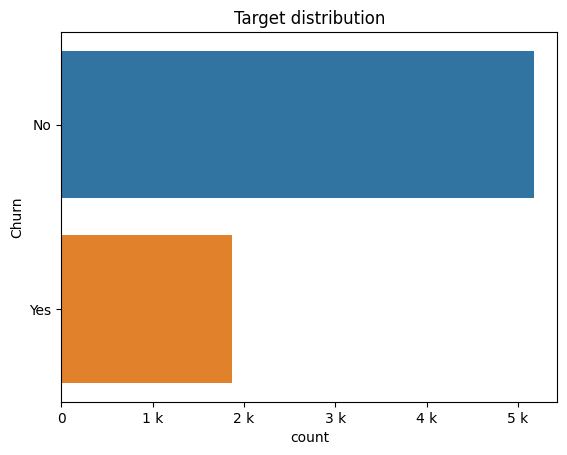

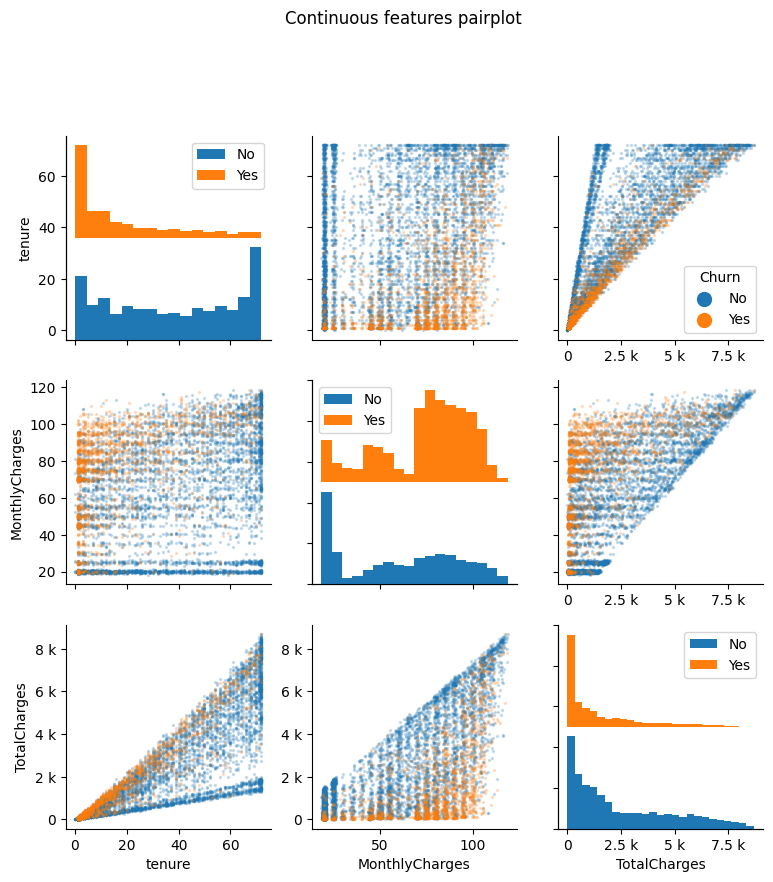

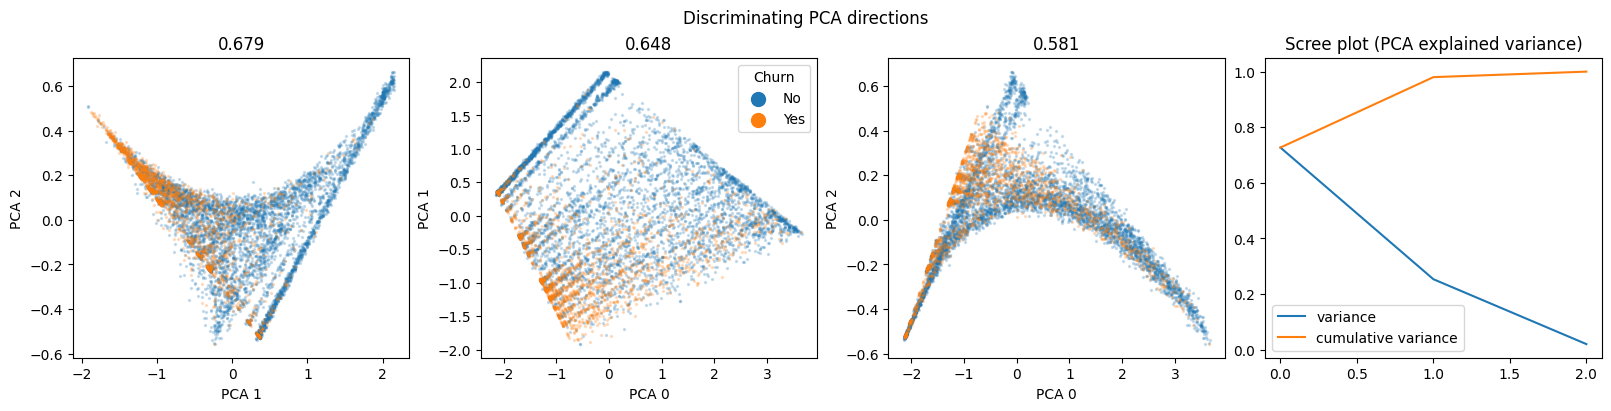

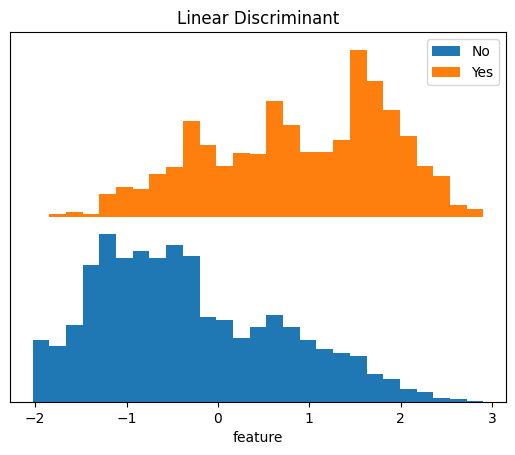

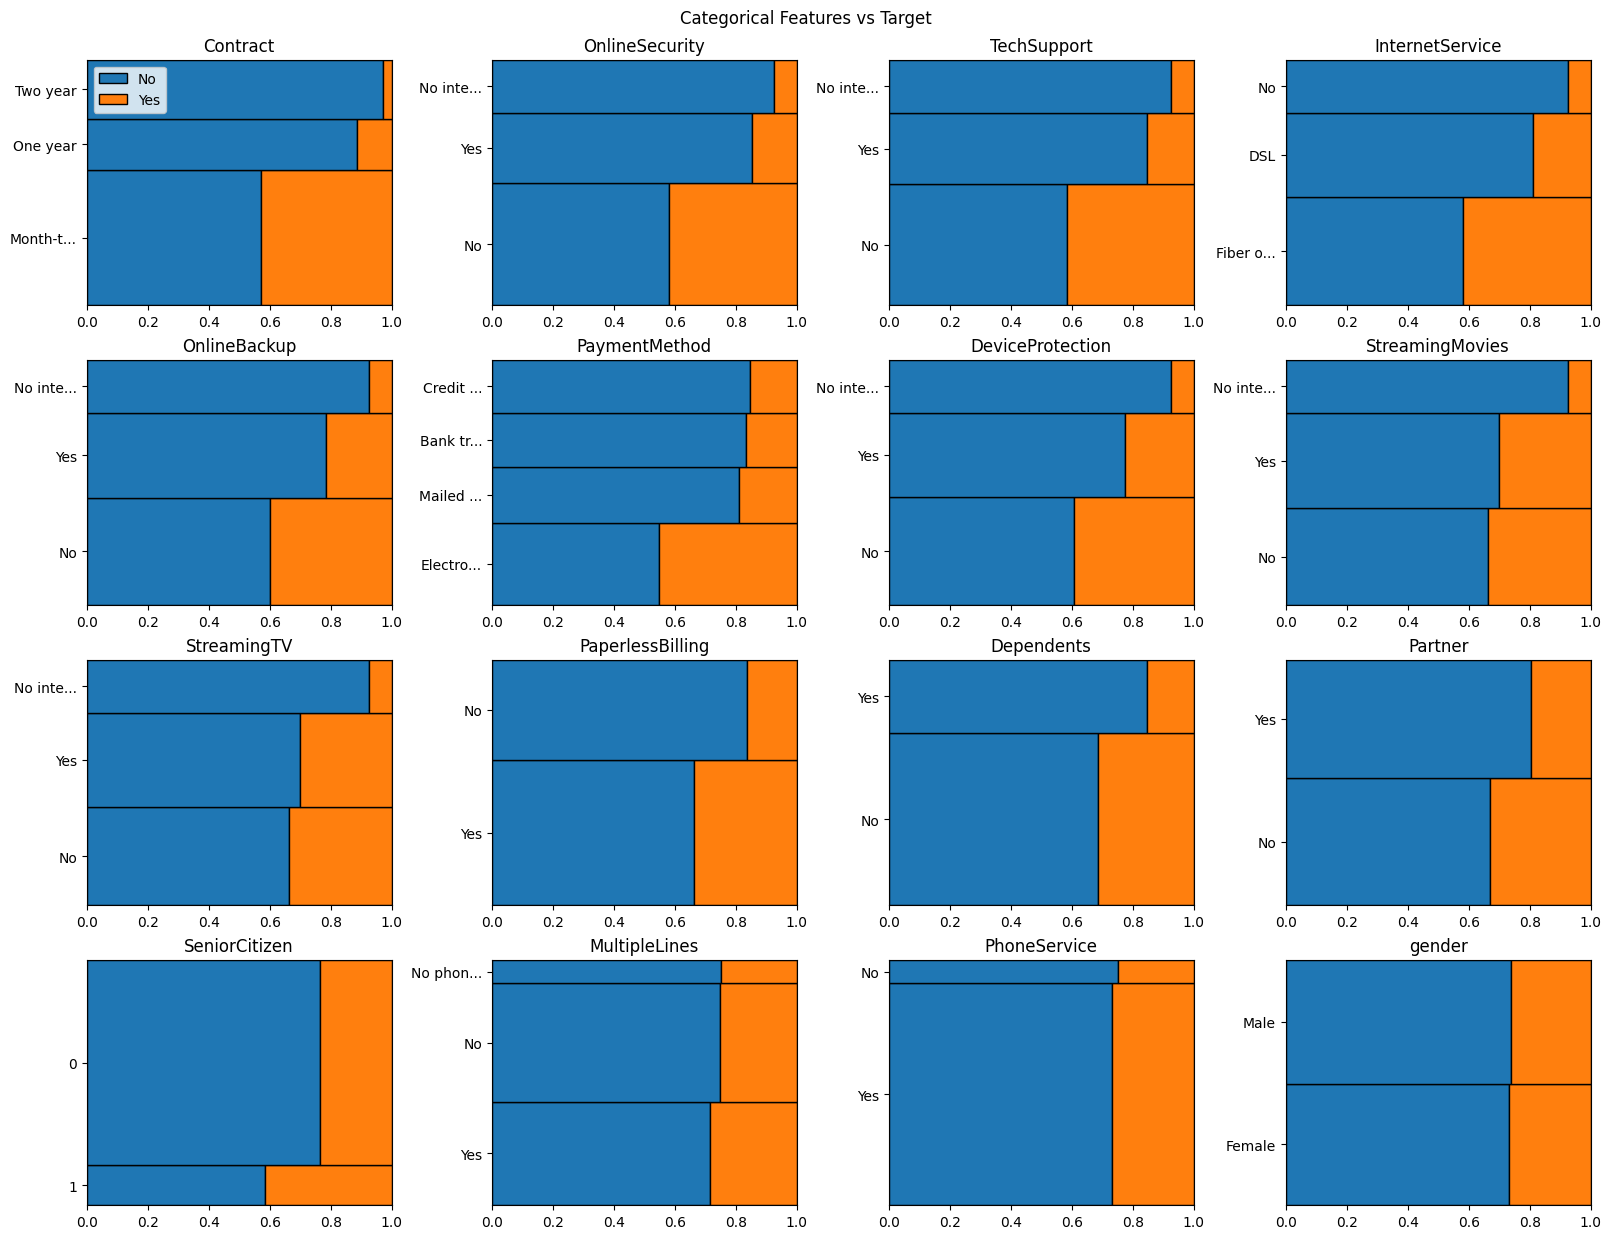

In [15]:
# Use DABL's data cleaning and auto-EDA
dabl.clean(df, verbose=1)

# Auto-EDA using DABL
dabl.plot(df, target_col='Churn')

# Show the plots
import matplotlib.pyplot as plt
plt.show()

In [16]:
# for col in df.columns:
#     if pd.api.types.is_numeric_dtype(df[col]):
#         # For numeric columns, create a distribution plot with KDE
#         sns.distplot(df[col], kde=True)
#         plt.title(f'Distribution of {col}')
#         plt.show()
#     elif pd.api.types.is_object_dtype(df[col]):
#         # For categorical columns, create a count plot
#         sns.countplot(data=df, x=col)
#         plt.title(f'Count of {col}')
#         plt.xticks(rotation=45)
#         plt.show()

In [17]:
num = []
cat =[]
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        num.append(col)
    elif pd.api.types.is_object_dtype(df[col]):
        cat.append(col)
        
print('Numerical Columns:',num)
print('Categorical Columns:',cat)

Numerical Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']
Categorical Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']


### Numerical Columns

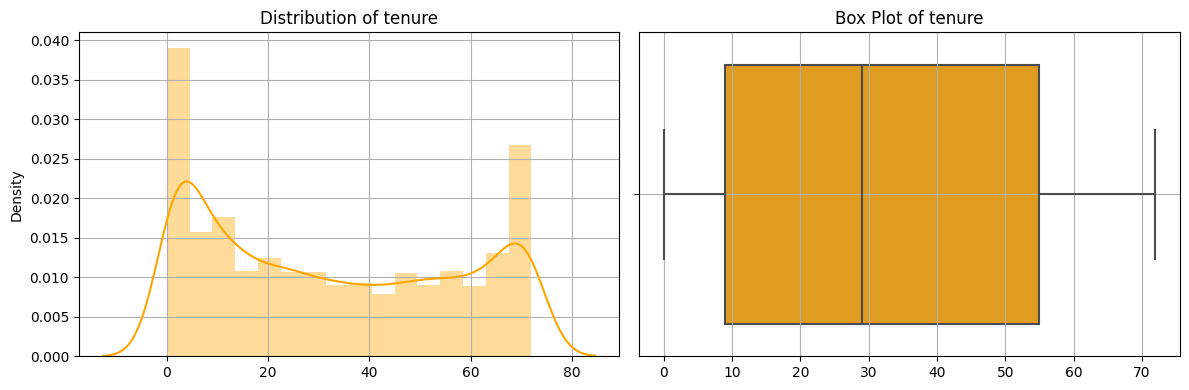

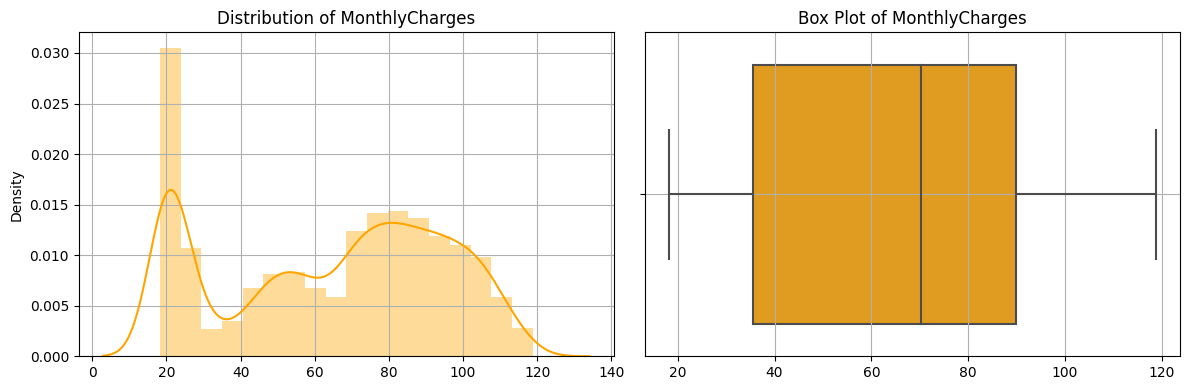

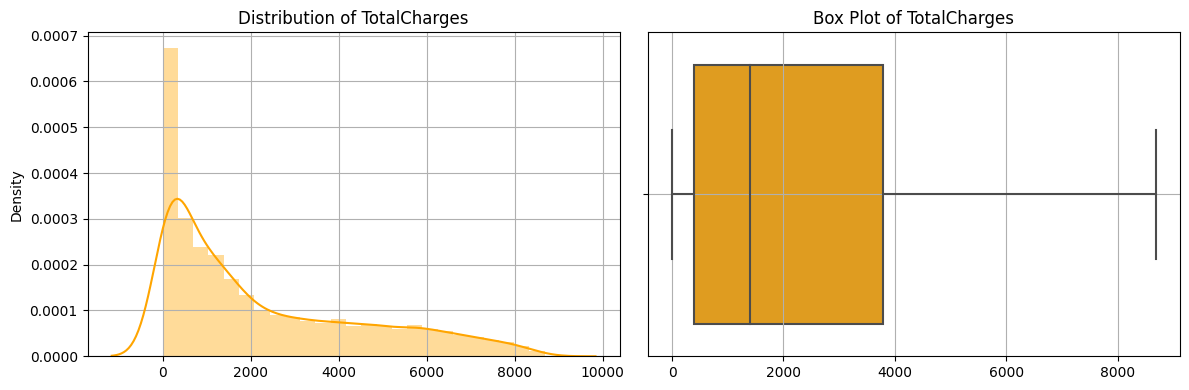

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns


for i in num:
    # Create a figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))

    # Plot the KDE plot with an orange tone
    sns.distplot(df[i], kde=True, ax=axes[0], color='orange')
    axes[0].set_title(f'Distribution of {i}')
    axes[0].grid(True)
    axes[0].set_xlabel('')
 
    # Plot the horizontal box plot with an orange tone
    sns.boxplot(x=df[i], ax=axes[1], color='orange')
    axes[1].set_title(f'Box Plot of {i}')
    axes[1].grid(True)
    axes[1].set_xlabel('')

    # Adjust the spacing between subplots
    plt.tight_layout()

    # Save the plot with a transparent background
    plt.savefig(f'{i}.png', transparent=True)

    # Show the plot
    plt.show()


In [19]:
# numerical_columns

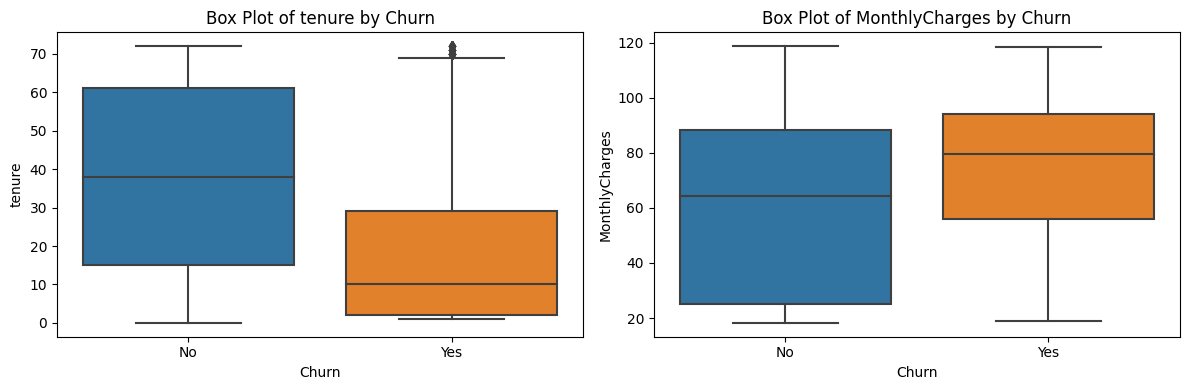

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
numerical_columns = ['tenure', 'MonthlyCharges']
churn_column = 'Churn'

fig, axes = plt.subplots(1, len(numerical_columns), figsize=(12, 4))
fig.subplots_adjust(wspace=0.5)

for i, column in enumerate(numerical_columns):
    ax = axes[i]
    sns.boxplot(x=df[churn_column], y=df[column], ax=ax)
    ax.set_title(f'Box Plot of {column} by {churn_column}')
    ax.set_xlabel(churn_column)
    ax.set_ylabel(column)
    ax.grid(False)  # Remove the grid lines

plt.savefig(f'Numerical Variables vs Churn.png', transparent=True)
    
plt.tight_layout()
plt.show()


In [21]:
import pandas as pd

# Assuming your dataframe is named 'df'
numerical_columns = ['tenure', 'MonthlyCharges']
churn_column = 'Churn'

# Group the numerical columns by the 'Churn' column and calculate descriptive statistics
statistics = df.groupby(churn_column)[numerical_columns].describe()

# Display the descriptive statistics
print(statistics)


       tenure                                                      
        count       mean        std  min   25%   50%   75%   max   
Churn                                                              
No     5174.0  37.569965  24.113777  0.0  15.0  38.0  61.0  72.0  \
Yes    1869.0  17.979133  19.531123  1.0   2.0  10.0  29.0  72.0   

      MonthlyCharges                                                            
               count       mean        std    min    25%     50%   75%     max  
Churn                                                                           
No            5174.0  61.265124  31.092648  18.25  25.10  64.425  88.4  118.75  
Yes           1869.0  74.441332  24.666053  18.85  56.15  79.650  94.2  118.35  


### Insights
> Higher the tenure, lesser the tendency to churn

> Higher the Montly Charges, higher the tendency to churn

> Customers who pay higher Monthly charges tend to churn faster, however customers who paid more in total charges churn lesser than those who paid less Total charges. However we can see some outliers

In [22]:
import pandas as pd
from scipy.stats import f_oneway

# Assuming you have your data in a pandas DataFrame called 'df'

# Drop any missing values
df.dropna(inplace=True)

# Select numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns

# Create an empty DataFrame to store the ANOVA test results
anova_results = pd.DataFrame(columns=['Column', 'F-statistic', 'P-value'])

# Perform ANOVA test for each numerical column
for column in numerical_columns:
    churned = df[df['Churn'] == 'Yes'][column]
    not_churned = df[df['Churn'] == 'No'][column]

    f_statistic, p_value = f_oneway(churned, not_churned)

    # Store the ANOVA test results in a temporary DataFrame
    temp_df = pd.DataFrame({'Column': [column], 'F-statistic': [f_statistic], 'P-value': [p_value]})

    # Concatenate the temporary DataFrame with the anova_results DataFrame
    anova_results = pd.concat([anova_results, temp_df], ignore_index=True)

# Display the ANOVA test results
anova_results




,Column,F-statistic,P-value
0,tenure,997.268010,7.999058e-205
1,MonthlyCharges,273.463704,2.706646e-60
2,TotalCharges,288.278961,2.127212e-63


'tenure': Length of tenure significantly influences churn (F=997.27, p<0.001).

'MonthlyCharges': Monthly charges have a significant impact on churn (F=273.46, p<0.001).

'TotalCharges': Total charges show a strong association with churn (F=288.28, p<0.001).

# Actionable Plans

**Tenure:**
- Implement targeted retention programs for customers with longer tenures.
- Offer exclusive rewards and personalized incentives to increase loyalty and reduce churn.

**MonthlyCharges:**
- Conduct pricing analysis to optimize pricing strategies.
- Introduce flexible pricing plans and value-added services to mitigate the impact of high monthly charges on churn.

**TotalCharges:**
- Improve customer communication and support regarding total charges.
- Provide transparent billing statements and flexible payment options.
- Offer proactive assistance to address concerns and reduce churn associated with high total charges.


In [23]:
# Create a dictionary of column names and insights
insights = {
    'tenure': "Length of tenure significantly influences churn.",
    'MonthlyCharges': "Monthly charges have a significant impact on churn.",
    'TotalCharges': "Total charges show a strong association with churn."
}

# Add the insights column to the ANOVA results dataframe
anova_results['Insights'] = [insights.get(column, '') for column in anova_results['Column']]


# Print the updated dataframe
# anova_results.to_csv('F statistic table.csv')


## Categorical Columns

In [24]:
for i in cat:
    print((i, df[i].nunique()), end = ' ')

('customerID', 7043) ('gender', 2) ('SeniorCitizen', 2) ('Partner', 2) ('Dependents', 2) ('PhoneService', 2) ('MultipleLines', 3) ('InternetService', 3) ('OnlineSecurity', 3) ('OnlineBackup', 3) ('DeviceProtection', 3) ('TechSupport', 3) ('StreamingTV', 3) ('StreamingMovies', 3) ('Contract', 3) ('PaperlessBilling', 2) ('PaymentMethod', 4) ('Churn', 2) 

In [25]:
import pandas as pd

# Assuming your dataframe is named 'df'
churn_table = df[['customerID', 'gender', 'SeniorCitizen', 'InternetService', 'MonthlyCharges', 'Churn']]
churn_table = churn_table.head(10)  # Selecting first 10 rows for demonstration

churn_table


,customerID,gender,SeniorCitizen,InternetService,MonthlyCharges,Churn
0,7590-VHVEG,Female,0,DSL,29.85,No
1,5575-GNVDE,Male,0,DSL,56.95,No
2,3668-QPYBK,Male,0,DSL,53.85,Yes
3,7795-CFOCW,Male,0,DSL,42.30,No
4,9237-HQITU,Female,0,Fiber optic,70.70,Yes
5,9305-CDSKC,Female,0,Fiber optic,99.65,Yes
6,1452-KIOVK,Male,0,Fiber optic,89.10,No
7,6713-OKOMC,Female,0,DSL,29.75,No
8,7892-POOKP,Female,0,Fiber optic,104.80,Yes
9,6388-TABGU,Male,0,DSL,56.15,No


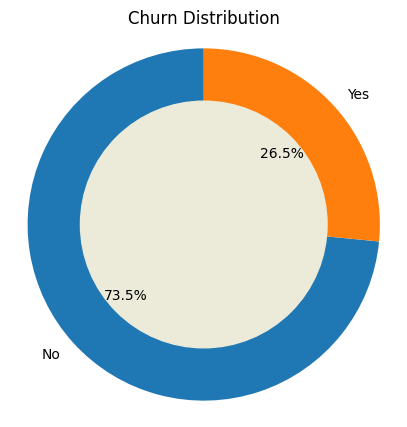

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
churn_counts = df['Churn'].value_counts()

plt.figure(figsize=(5, 5))
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops={'linewidth': 4})
plt.title('Churn Distribution', loc='center')  # Set the title in the center
plt.axis('equal')  # Set aspect ratio to make the pie chart circular

# Add a white circle in the center to create a donut plot effect
plt.gca().add_artist(plt.Circle((0, 0), 0.7, color='#ecebda'))

plt.savefig('churn_donut_plot.png', transparent=True, bbox_inches='tight')
plt.show()


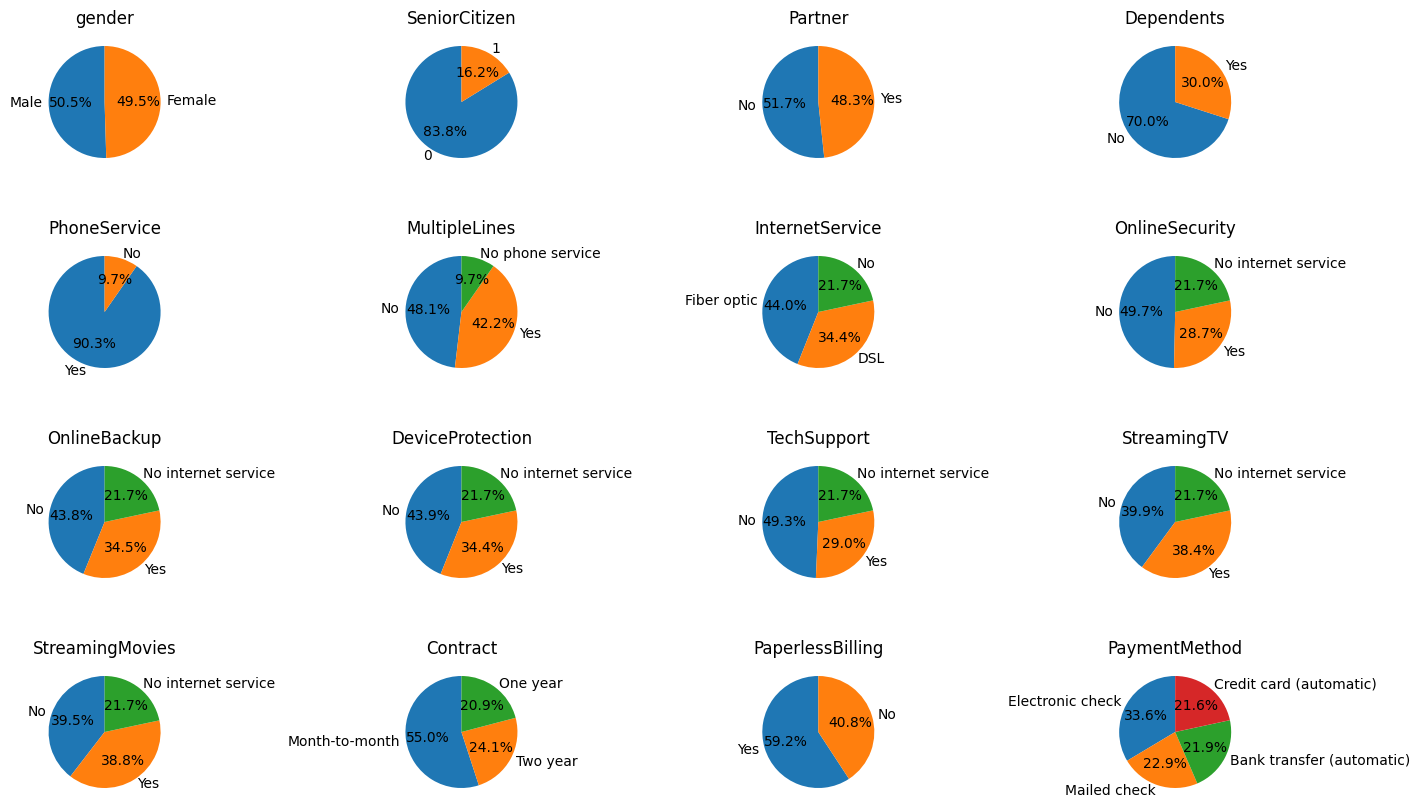

In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
categorical_columns = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])

num_plots = len(categorical_columns)
num_cols = 4  # Number of charts per row
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(18, 10))
fig.subplots_adjust(hspace=0.5, wspace=0.1)  # Adjust spacing between subplots

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    ax.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
    ax.set_title(column)

    # Set aspect ratio to make the pie charts circular
    ax.set_aspect('equal')

# Remove empty subplots if the number of plots is not a perfect multiple of num_cols
if num_plots % num_cols != 0:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.savefig(f'pie charts.png', transparent=True, bbox_inches='tight')  # Save the figure with a transparent background and tight bounding box
plt.show()


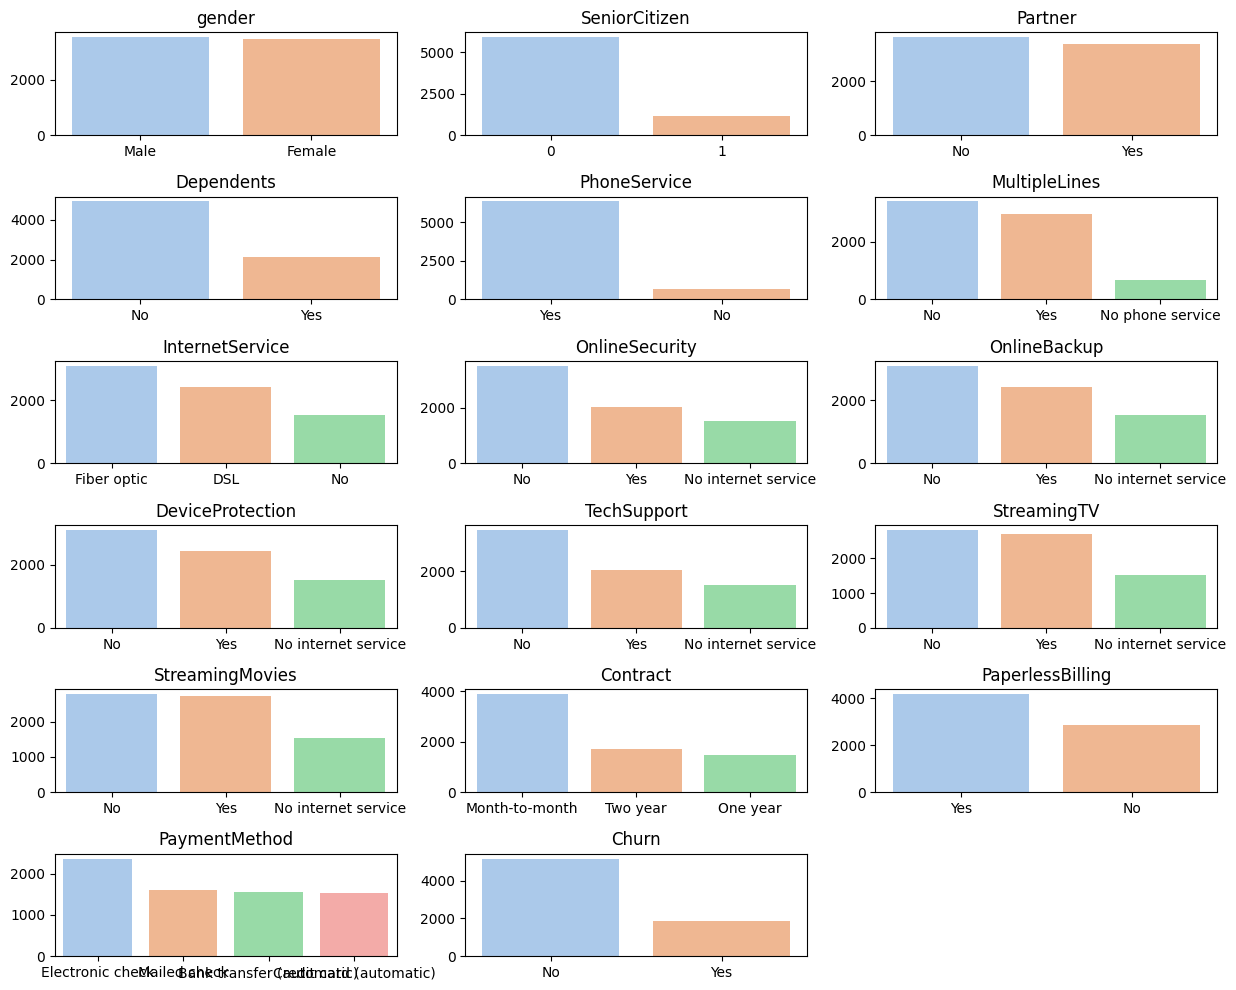

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your dataframe is named 'df'
categorical_columns = df.columns[df.dtypes == 'object'].drop('customerID')

num_plots = len(categorical_columns)
num_cols = 3
num_rows = (num_plots - 1) // num_cols + 1

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 12))
fig.subplots_adjust(hspace=0.6)

sns.set_palette('pastel')  # Set color palette

for i, column in enumerate(categorical_columns):
    row = i // num_cols
    col = i % num_cols
    ax = axes[row, col]
    counts = df[column].value_counts()
    sns.barplot(x=counts.index, y=counts.values, ax=ax)
    ax.set_xlabel('')
    ax.set_title(column)

# In case the number of subplots is not a perfect square, remove empty subplots
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

plt.show()


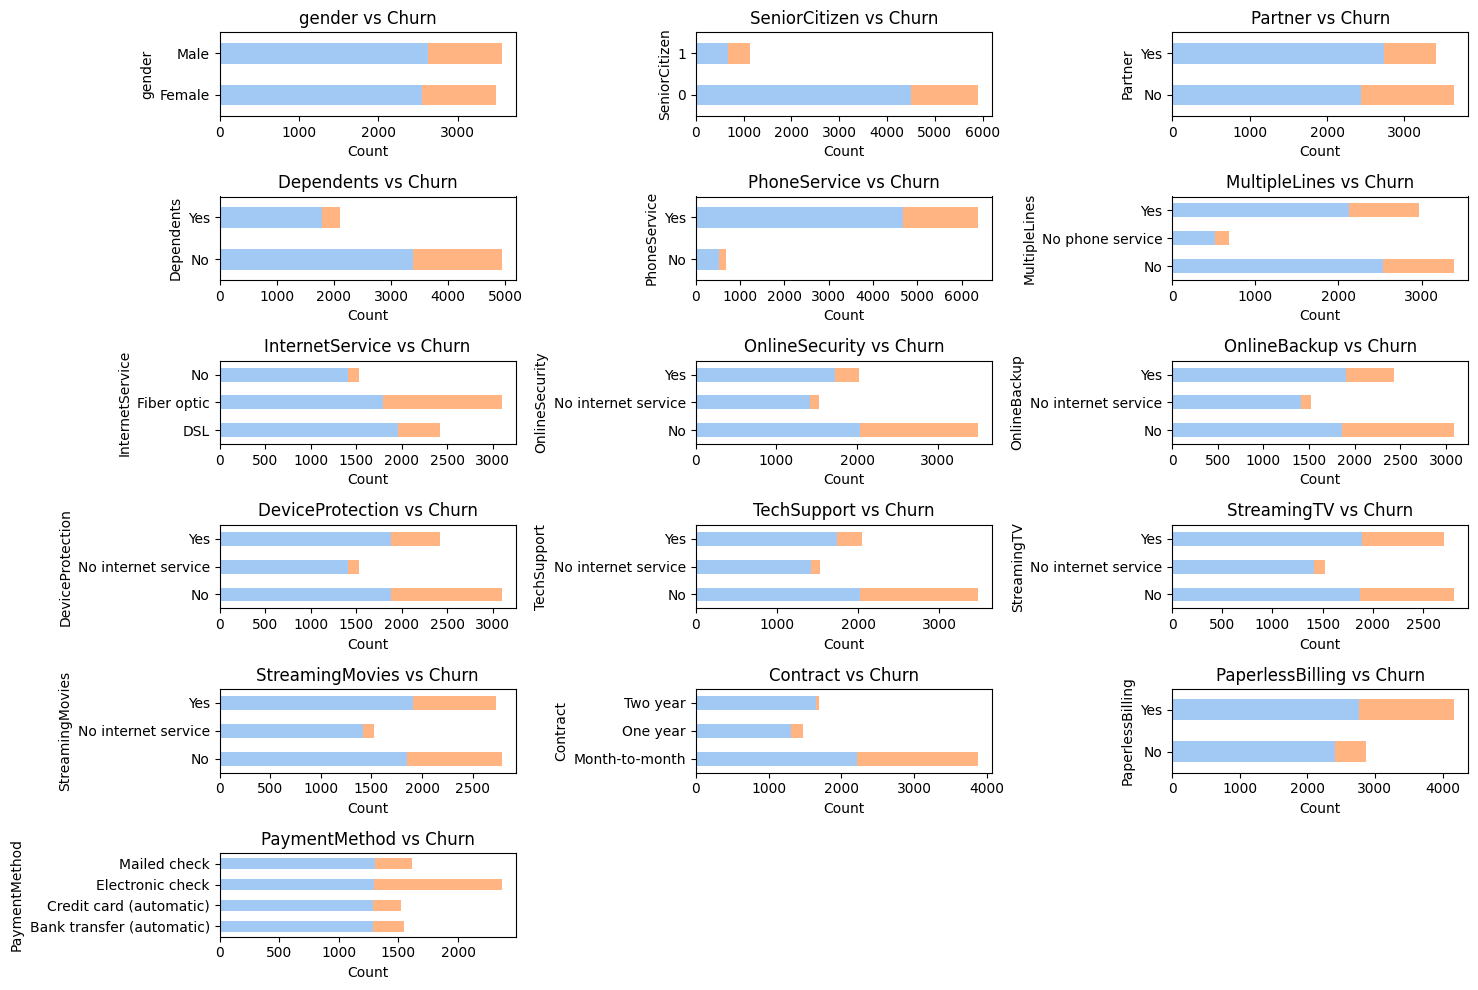

In [29]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Select the constant variable for 'Churn'
constant_variable = 'Churn'

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed based on the number of variables
num_plots = len(categorical_columns)
num_rows = (num_plots - 1) // num_cols + 1

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig.subplots_adjust(hspace=0.6)

# Iterate over each categorical variable
for i, column in enumerate(categorical_columns):
    # Calculate the cross-tabulation between the current variable and 'Churn'
    crosstab = pd.crosstab(df[column], df[constant_variable])
    
    # Plot the stacked bar plot horizontally
    ax = axes[i // num_cols, i % num_cols]
    crosstab.plot(kind='barh', stacked=True, ax=ax)
    
    ax.set_title(f"{column} vs {constant_variable}")
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    ax.legend().remove()  # Remove the legend

# Remove empty subplots if the number of variables is not a perfect multiple of num_cols
if num_plots < num_rows * num_cols:
    for j in range(num_plots, num_rows * num_cols):
        fig.delaxes(axes.flatten()[j])

# Adjust layout
plt.tight_layout()

# Save the figure
plt.savefig('stacked_bar_plots.png', transparent=True, bbox_inches='tight')

# Show the plot
plt.show()


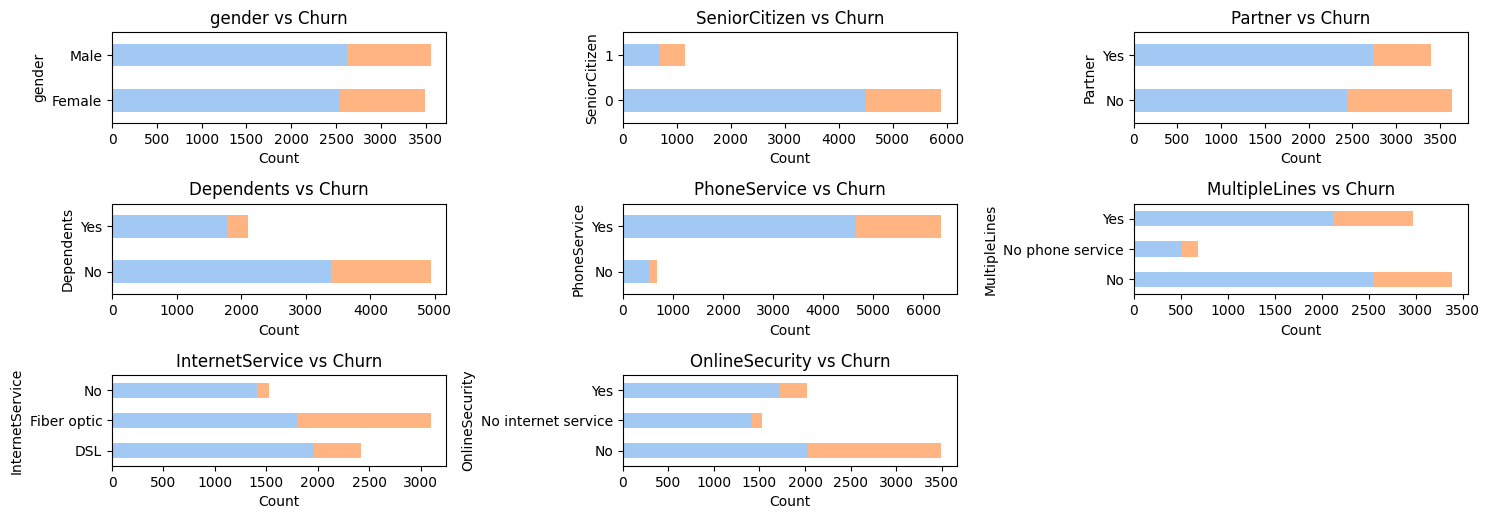

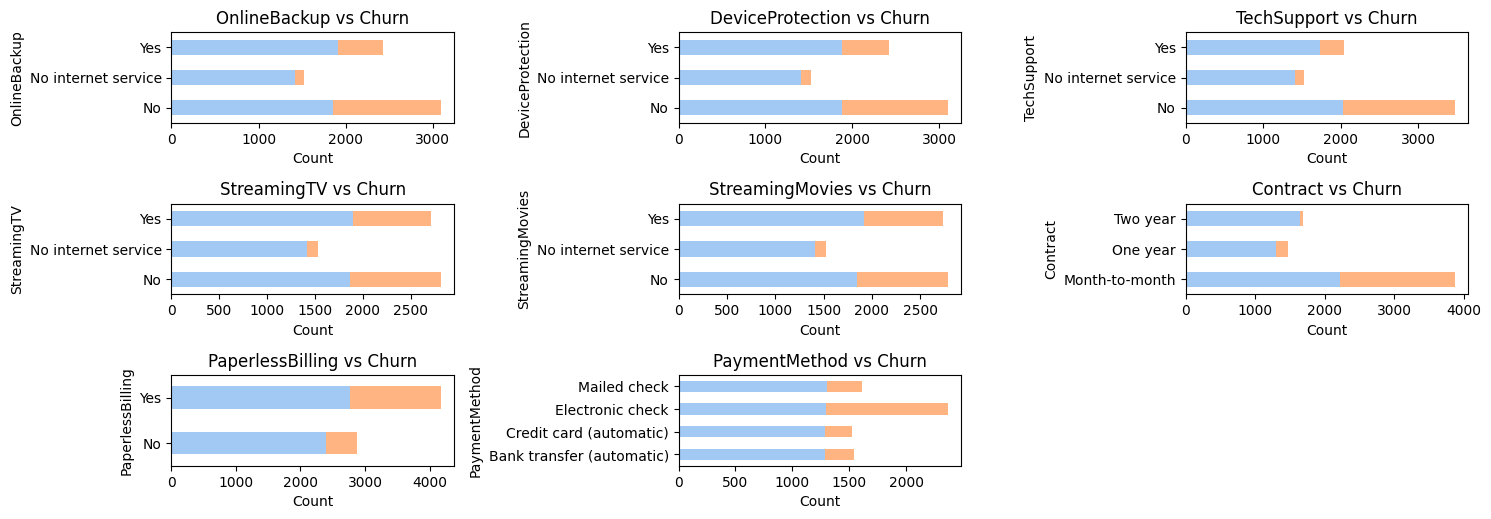

In [30]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
categorical_columns = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
                       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
                       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Select the constant variable for 'Churn'
constant_variable = 'Churn'

# Set the number of columns for subplots
num_cols = 3

# Calculate the number of rows needed based on the number of variables
num_plots = len(categorical_columns)
num_rows = (num_plots - 1) // num_cols + 1

# Calculate the number of plots in each slide
num_plots_per_slide = num_plots // 2

# Create subplots for the first slide
fig1, axes1 = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig1.subplots_adjust(hspace=0.6)

# Iterate over each categorical variable for the first slide
for i, column in enumerate(categorical_columns[:num_plots_per_slide]):
    # Calculate the cross-tabulation between the current variable and 'Churn'
    crosstab = pd.crosstab(df[column], df[constant_variable])
    
    # Plot the stacked bar plot horizontally
    ax = axes1[i // num_cols, i % num_cols]
    crosstab.plot(kind='barh', stacked=True, ax=ax)
    
    ax.set_title(f"{column} vs {constant_variable}")
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    ax.legend().remove()  # Remove the legend

# Remove empty subplots if the number of variables is not a perfect multiple of num_cols
if num_plots_per_slide < num_rows * num_cols:
    for j in range(num_plots_per_slide, num_rows * num_cols):
        fig1.delaxes(axes1.flatten()[j])

# Adjust layout
plt.tight_layout()

# Save the first slide
plt.savefig('stacked_bar_plots_slide1.png', transparent=True, bbox_inches='tight')
plt.show()
# Close the first figure
plt.close(fig1)

# Create subplots for the second slide
fig2, axes2 = plt.subplots(num_rows, num_cols, figsize=(15, 10))
fig2.subplots_adjust(hspace=0.6)

# Iterate over each categorical variable for the second slide
for i, column in enumerate(categorical_columns[num_plots_per_slide:]):
    # Calculate the cross-tabulation between the current variable and 'Churn'
    crosstab = pd.crosstab(df[column], df[constant_variable])
    
    # Plot the stacked bar plot horizontally
    ax = axes2[i // num_cols, i % num_cols]
    crosstab.plot(kind='barh', stacked=True, ax=ax)
    
    ax.set_title(f"{column} vs {constant_variable}")
    ax.set_xlabel('Count')
    ax.set_ylabel(column)
    ax.legend().remove()  # Remove the legend

# Remove empty subplots if the number of variables is not a perfect multiple of num_cols
if num_plots - num_plots_per_slide < num_rows * num_cols:
    for j in range(num_plots - num_plots_per_slide, num_rows * num_cols):
        fig2.delaxes(axes2.flatten()[j])

# Adjust layout
plt.tight_layout()

# Save the second slide
plt.savefig('stacked_bar_plots_slide2.png', transparent=True, bbox_inches='tight')
plt.show()
# Close the second figure
plt.close(fig2)


In [31]:
# categorical_columns = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])
# crosstabs = {}
# for column in categorical_columns:
#     # Create a cross-tabulation between 'Churn' and the current column
#     crosstab = pd.crosstab(df[column], df['Churn'])
#     # Normalize the values to represent proportions
#     crosstab = crosstab.div(crosstab.sum(axis=1), axis=0)
#     crosstabs[column] = crosstab
# crosstabs

## Insights of categorical_columns for ML Modeling

- **Gender vs Churn:**
  - Females have a churn rate of approximately 27% while males have a churn rate of around 26%.
  - Gender does not appear to have a significant impact on the churn rate.

- **SeniorCitizen vs Churn:**
  - Senior citizens (SeniorCitizen=1) have a higher churn rate of about 42% compared to non-senior citizens (SeniorCitizen=0) with a churn rate of approximately 24%.
  - SeniorCitizen status seems to be a significant factor influencing the churn rate.

- **Partner vs Churn:**
  - Customers without partners (Partner=No) have a slightly higher churn rate of about 33% compared to customers with partners (Partner=Yes) with a churn rate of around 20%.
  - Having a partner appears to have a positive impact on reducing the churn rate.

- **Dependents vs Churn:**
  - Customers without dependents (Dependents=No) have a higher churn rate of about 31% compared to customers with dependents (Dependents=Yes) with a churn rate of approximately 15%.
  - Having dependents seems to have a positive influence on reducing the churn rate.

- **PhoneService vs Churn:**
  - The churn rate for customers with phone service (PhoneService=Yes) is around 27% while for customers without phone service (PhoneService=No), it is about 25%.
  - Having or not having phone service does not significantly impact the churn rate.

- **MultipleLines vs Churn:**
  - Customers with multiple lines (MultipleLines=Yes) have a slightly higher churn rate of about 29% compared to customers with no multiple lines (MultipleLines=No or No phone service) with a churn rate of around 25%.
  - MultipleLines feature does not strongly influence the churn rate.

- **InternetService vs Churn:**
  - Customers with fiber optic internet service (InternetService=Fiber optic) have a significantly higher churn rate of about 42% compared to customers with DSL (churn rate around 19%) or no internet service (churn rate around 7%).
  - Fiber optic internet service appears to be a significant factor contributing to higher churn rates.

- **OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies vs Churn:**
  - Customers without these additional services (No or No internet service) generally have higher churn rates compared to customers with these services.
  - The impact of these services on churn rates varies, but in general, customers without these services tend to churn at higher rates.

- **Contract vs Churn:**
  - Customers with a month-to-month contract have a higher churn rate of about 43%, while customers with one-year and two-year contracts have lower churn rates of approximately 11% and 28% respectively.
  - Contract duration is a significant factor affecting the churn rate, with longer-term contracts showing lower churn rates.

- **PaperlessBilling vs Churn:**
  - Customers with paperless billing (PaperlessBilling=Yes) have a slightly higher churn rate of about 34% compared to customers without paperless billing (PaperlessBilling=No) with a churn rate of around 16%.
  - Paperless billing does have some impact on the churn rate, but the effect is not substantial.

- **PaymentMethod vs Churn:**
  - Customers using payment methods such as Electronic check have a higher churn rate of about 45% compared to other payment methods like Bank transfer (automatic), Credit card (automatic), or Mailed check, which have churn rates ranging from 15% to 19%.
  - Choice of payment method appears to be a significant factor influencing the churn rate.


- Gender: Implement gender-neutral marketing strategies to ensure equal focus on both genders and avoid any biases in customer engagement and retention efforts.

- SeniorCitizen: Develop personalized loyalty programs and exclusive offers specifically designed for senior citizens to enhance their satisfaction and loyalty.

- Partner: Create partner-centric loyalty programs and incentives to strengthen customer retention among customers with partners.

- Dependents: Offer family-oriented bundles and services that cater to the needs of customers with dependents, providing them with additional value and incentives to stay.

- PhoneService: Conduct customer surveys and feedback analysis to identify reasons for churn among customers without phone service. Develop alternative communication solutions or enhanced offerings to address their needs.

- MultipleLines: Enhance the features and benefits of multiple lines service to differentiate it from single-line options and incentivize customers to retain this service.

- InternetService: Focus on improving the reliability and customer experience of fiber optic internet service. Provide attractive incentives for customers to switch from fiber optic to DSL or explore options to offer more affordable plans for fiber optic users.

- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies: Create targeted campaigns to educate customers about the benefits and added value of these services. Offer limited-time promotions or trial periods to encourage customers to try them out and experience their benefits.

- Contract: Develop persuasive marketing materials emphasizing the long-term cost savings and benefits of one-year and two-year contracts to encourage customers to choose these options over month-to-month contracts.

- PaperlessBilling: Improve the user experience of paperless billing systems, ensuring clear and easy-to-understand billing statements and providing proactive support to address any concerns or issues.

- PaymentMethod: Promote alternative payment methods such as bank transfer, credit card (automatic), or mailed check through targeted marketing campaigns. Highlight their security and convenience to encourage customers to switch from electronic check payments.


In [32]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the variables to test
variables = df.columns[df.dtypes == 'object'].drop(['customerID', 'Churn'])

# Perform chi-square test for each variable
results = []
for variable in variables:
    contingency_table = pd.crosstab(df[variable], df['Churn'])
    chi2, p_value, _, _ = chi2_contingency(contingency_table)
    results.append({'Variable': variable, 'Chi-square': chi2, 'p-value': p_value})

# Create a DataFrame with the test results
results_df = pd.DataFrame(results)

# Display the results
results_df

,Variable,Chi-square,p-value
0,gender,0.484083,4.865787e-01
1,SeniorCitizen,159.426300,1.510067e-36
2,Partner,158.733382,2.139911e-36
3,Dependents,189.129249,4.924922e-43
4,PhoneService,0.915033,3.387825e-01
5,MultipleLines,11.330441,3.464383e-03
6,InternetService,732.309590,9.571788e-160
7,OnlineSecurity,849.998968,2.661150e-185
8,OnlineBackup,601.812790,2.079759e-131
9,DeviceProtection,558.419369,5.505219e-122


1. 'gender': Gender does not appear to have a significant association with churn.

2. 'SeniorCitizen': Senior citizens are more likely to churn compared to non-senior citizens.

3. 'Partner': Customers with partners are less likely to churn than those without partners.

4. 'Dependents': Customers with dependents are less likely to churn than those without dependents.

5. 'PhoneService': Having phone service does not strongly influence churn.

6. 'MultipleLines': Customers with multiple lines may have a slightly higher likelihood of churn.

7. 'InternetService': The type of internet service has a strong impact on churn.

8. 'OnlineSecurity': Customers without online security are more likely to churn.

9. 'OnlineBackup': Customers without online backup are more likely to churn.

10. 'DeviceProtection': Customers without device protection are more likely to churn.

11. 'TechSupport': Customers without tech support are more likely to churn.

12. 'StreamingTV': Streaming TV services may have a slight impact on churn.

13. 'StreamingMovies': Streaming movie services may have a slight impact on churn.

14. 'Contract': The contract type significantly affects churn, with shorter-term contracts associated with higher churn.

15. 'PaperlessBilling': Customers with paperless billing have a higher likelihood of churn.

16. 'PaymentMethod': The choice of payment method has a notable influence on churn.


In [33]:
insights = {
    'gender': "Gender does not appear to have a significant association with churn.",
    'SeniorCitizen': "Senior citizens are more likely to churn compared to non-senior citizens.",
    'Partner': "Customers with partners are less likely to churn than those without partners.",
    'Dependents': "Customers with dependents are less likely to churn than those without dependents.",
    'PhoneService': "Having phone service does not strongly influence churn.",
    'MultipleLines': "Customers with multiple lines may have a slightly higher likelihood of churn.",
    'InternetService': "The type of internet service has a strong impact on churn.",
    'OnlineSecurity': "Customers without online security are more likely to churn.",
    'OnlineBackup': "Customers without online backup are more likely to churn.",
    'DeviceProtection': "Customers without device protection are more likely to churn.",
    'TechSupport': "Customers without tech support are more likely to churn.",
    'StreamingTV': "Streaming TV services may have a slight impact on churn.",
    'StreamingMovies': "Streaming movie services may have a slight impact on churn.",
    'Contract': "The contract type significantly affects churn, with shorter-term contracts associated with higher churn.",
    'PaperlessBilling': "Customers with paperless billing have a higher likelihood of churn.",
    'PaymentMethod': "The choice of payment method has a notable influence on churn."
}

results_df['insights'] = [insights.get(variable, '') for variable in results_df['Variable']]
# results_df.to_csv('Chi square test table.csv')

results_df


,Variable,Chi-square,p-value,insights
0,gender,0.484083,4.865787e-01,Gender does not appear to have a significant a...
1,SeniorCitizen,159.426300,1.510067e-36,Senior citizens are more likely to churn compa...
2,Partner,158.733382,2.139911e-36,Customers with partners are less likely to chu...
3,Dependents,189.129249,4.924922e-43,Customers with dependents are less likely to c...
4,PhoneService,0.915033,3.387825e-01,Having phone service does not strongly influen...
5,MultipleLines,11.330441,3.464383e-03,Customers with multiple lines may have a sligh...
6,InternetService,732.309590,9.571788e-160,The type of internet service has a strong impa...
7,OnlineSecurity,849.998968,2.661150e-185,Customers without online security are more lik...
8,OnlineBackup,601.812790,2.079759e-131,Customers without online backup are more likel...
9,DeviceProtection,558.419369,5.505219e-122,Customers without device protection are more l...


## Data Preprocessing

In [34]:
# Calculate the correlation between 'column1' and 'column2'
correlation = df['tenure'].corr(df['MonthlyCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation}")

Correlation: 0.24789985628615008


In [35]:
# Calculate the correlation between 'column1' and 'column2'
correlation = df['tenure'].corr(df['TotalCharges'])

# Print the correlation coefficient
print(f"Correlation: {correlation}")

Correlation: 0.826178397950242


# Assignment

## Numerical Variables:
1. Tenure:
   - Implement loyalty programs and personalized support for long-term customers.
   - Provide strong onboarding experiences for new customers.

2. MonthlyCharges:
   - Conduct a pricing analysis and offer competitive rates.
   - Introduce flexible pricing options or bundle services.

3. TotalCharges:
   - Simplify billing processes and provide transparent communication.
   - Offer installment plans or payment options.

## Categorical Variables:
1. Gender:
   - Develop inclusive marketing campaigns and ensure respectful customer support.

2. SeniorCitizen:
   - Customize communication channels and create tailored resources.
   - Offer senior-specific benefits or discounts.

3. Partner and Dependents:
   - Provide partner-specific and family-oriented plans or services.
   - Offer joint promotions and family bundle packages.

4. PhoneService and MultipleLines:
   - Ensure reliable customer support and transparent pricing.
   - Offer customized packages and monitor service quality.

5. InternetService:
   - Enhance service quality and offer personalized packages.
   - Provide reliable online security and backup solutions.

6. DeviceProtection, OnlineSecurity, and TechSupport:
   - Educate customers and offer comprehensive protection and support.
   - Provide self-help resources and proactive alerts.

7. StreamingTV and StreamingMovies:
   - Update and expand content libraries with personalized recommendations.
   - Improve streaming quality and offer exclusive releases.

8. Contract and PaperlessBilling:
   - Offer incentives for longer-term contracts and flexible contract options.
   - Streamline paperless billing and communicate its benefits.

9. PaymentMethod:
   - Expand payment options and simplify the payment process.


# Actionable Plans
- Gender:
  - Implement gender-neutral marketing strategies to ensure equal focus on both genders.
  - Avoid biases in customer engagement and retention efforts.

- SeniorCitizen:
  - Develop personalized loyalty programs and exclusive offers for senior citizens.
  - Enhance their satisfaction and loyalty through targeted initiatives.

- Partner:
  - Create partner-centric loyalty programs and incentives.
  - Strengthen customer retention among customers with partners.

- Dependents:
  - Offer family-oriented bundles and services to cater to customers with dependents.
  - Provide additional value and incentives to encourage them to stay.

- PhoneService:
  - Conduct surveys and feedback analysis for customers without phone service.
  - Develop alternative communication solutions or enhanced offerings.

- MultipleLines:
  - Enhance features and benefits of multiple lines service.
  - Incentivize customers to retain this service over single-line options.

- InternetService:
  - Focus on improving reliability and customer experience of fiber optic internet service.
  - Provide incentives for customers to switch from fiber optic to DSL or offer more affordable plans.

- OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies:
  - Create targeted campaigns to educate customers about the benefits of these services.
  - Offer limited-time promotions or trial periods to encourage adoption.

- Contract:
  - Develop persuasive marketing materials highlighting long-term cost savings and benefits.
  - Encourage customers to choose one-year and two-year contracts over month-to-month options.

- PaperlessBilling:
  - Improve user experience of paperless billing systems.
  - Provide clear and easy-to-understand billing statements and proactive support.

- PaymentMethod:
  - Promote alternative payment methods such as bank transfer, credit card (automatic), or mailed check.
  - Highlight security and convenience to encourage customers to switch from electronic check payments.


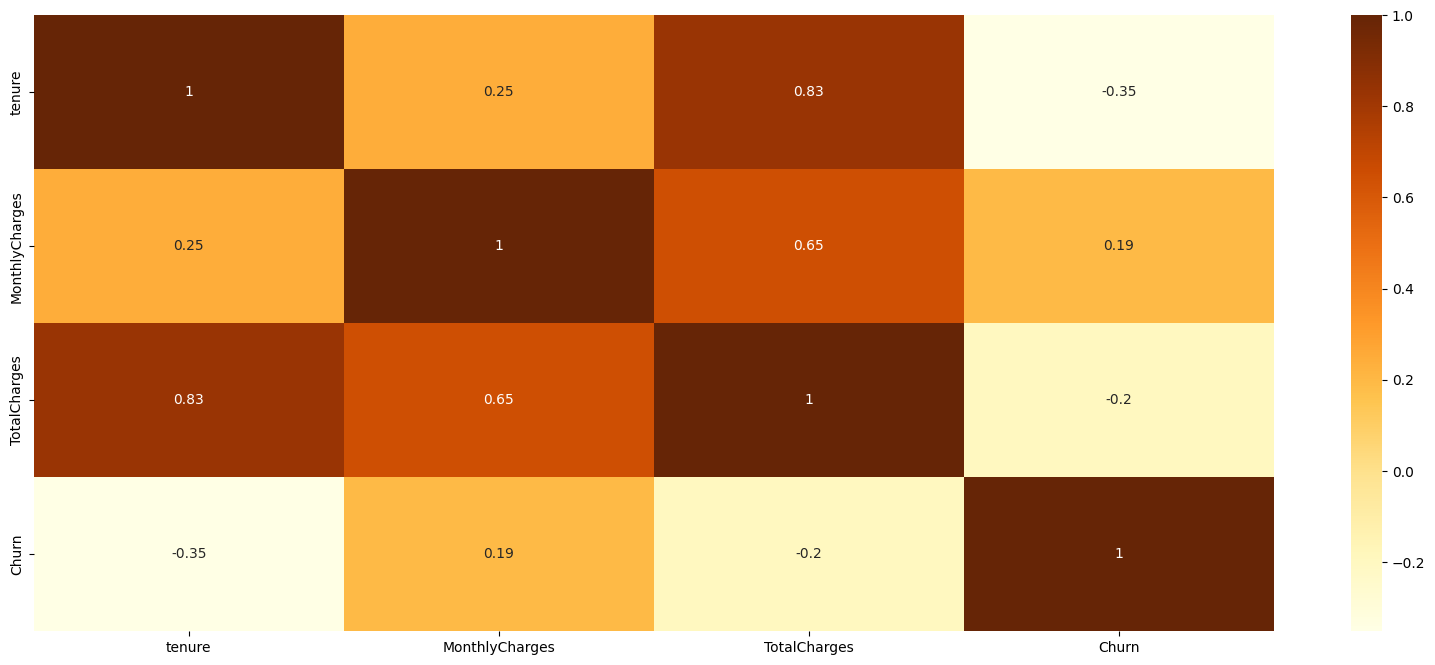

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
numerical_columns = df.select_dtypes(include='number')
churn_column = df['Churn'].map({'No': 0, 'Yes': 1})  # Encode 'No' as 0 and 'Yes' as 1

# Concatenate the numerical columns with the encoded 'Churn' column
data = pd.concat([numerical_columns, churn_column], axis=1)

# Calculate the correlation matrix
corr_matrix = data.corr()

# Create a heatmap of the correlation matrix with an orange color theme
plt.figure(figsize=(20, 8))
sns.heatmap(corr_matrix, cmap='YlOrBr', annot=True)
# plt.title('Correlation Matrix (Numerical Variables)')
plt.savefig('corr_matrix.png', transparent=True, bbox_inches='tight')

plt.show()


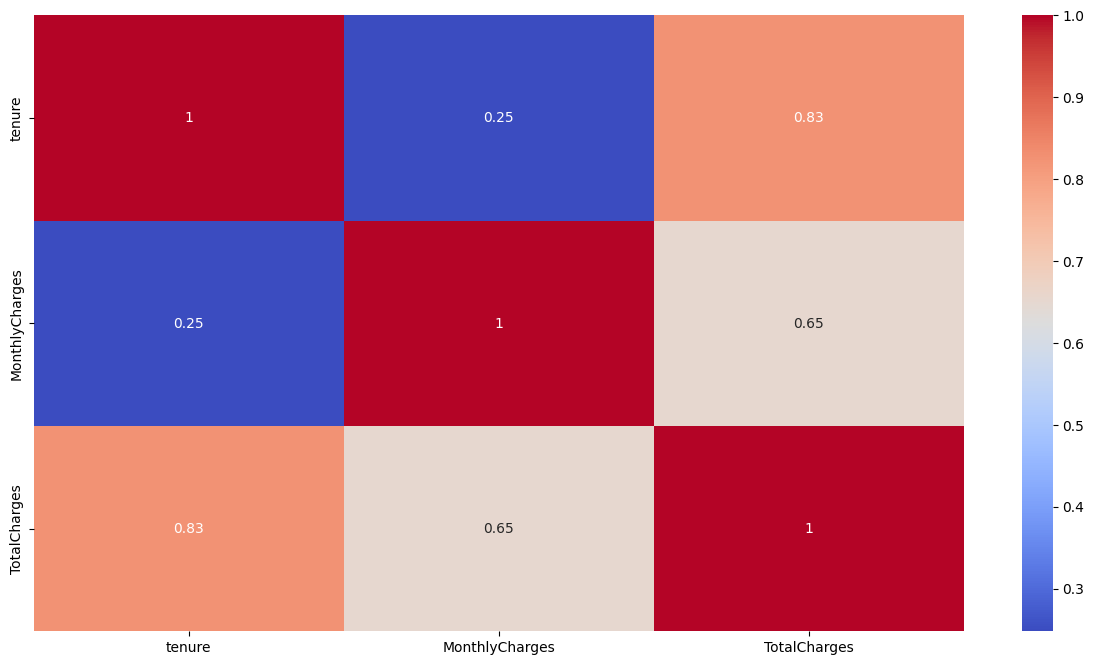

In [55]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your dataframe is named 'df'
numeric_columns = df.select_dtypes(include='number')

# Calculate the correlation matrix
corr_matrix = numeric_columns.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
# plt.title('Correlation Matrix')

plt.show()


In [43]:
# Assuming your dataframe is named 'df'
numeric_columns = df.select_dtypes(include='number')

# Convert categorical variables to one-hot encoding with drop_first=True
categorical_columns = df.select_dtypes(include='object').drop('customerID', axis=1)
encoded_columns = pd.get_dummies(categorical_columns, drop_first=True)

# Concatenate the numeric and encoded categorical columns
all_columns = pd.concat([numeric_columns, encoded_columns], axis=1)

In [44]:
all_columns

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,1,29.85,29.85,False,False,True,False,False,True,False,...,False,False,False,False,False,True,False,True,False,False
1,34,56.95,1889.50,True,False,False,False,True,False,False,...,False,False,False,True,False,False,False,False,True,False
2,2,53.85,108.15,True,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,True,True
3,45,42.30,1840.75,True,False,False,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
4,2,70.70,151.65,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,True,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,24,84.80,1990.50,True,False,True,True,True,False,True,...,True,False,True,True,False,True,False,False,True,False
7039,72,103.20,7362.90,False,False,True,True,True,False,True,...,True,False,True,True,False,True,True,False,False,False
7040,11,29.60,346.45,False,False,True,True,False,True,False,...,False,False,False,False,False,True,False,True,False,False
7041,4,74.40,306.60,True,True,True,False,True,False,True,...,False,False,False,False,False,True,False,False,True,True


In [45]:
# Calculate the correlation matrix
corr_matrix = all_columns.corr()

In [50]:
corr_matrix

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_1,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,...,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
tenure,1.000000,0.247900,0.826178,0.005106,0.016567,0.379697,0.159712,0.008448,-0.008448,0.331941,...,0.279756,-0.039062,0.286111,0.202570,0.558533,0.006152,0.233006,-0.208363,-0.233852,-0.352229
MonthlyCharges,0.247900,1.000000,0.651174,-0.014569,0.220173,0.096848,-0.113890,0.247398,-0.247398,0.490434,...,0.629603,-0.763557,0.627429,0.004904,-0.074681,0.352150,0.030550,0.271625,-0.377437,0.193356
TotalCharges,0.826178,0.651174,1.000000,-0.000080,0.103006,0.317504,0.062078,0.113214,-0.113214,0.468504,...,0.514973,-0.375223,0.520122,0.170814,0.354481,0.158574,0.182915,-0.059246,-0.295758,-0.198324
gender_Male,0.005106,-0.014569,-0.000080,1.000000,-0.001874,-0.001808,0.010517,-0.006488,0.006488,-0.008414,...,-0.008393,0.006026,-0.010487,0.008026,-0.003695,-0.011754,0.001215,0.000752,0.013744,-0.008612
SeniorCitizen_1,0.016567,0.220173,0.103006,-0.001874,1.000000,0.016479,-0.211185,0.008576,-0.008576,0.142948,...,0.105378,-0.182742,0.120176,-0.046262,-0.117000,0.156530,-0.024135,0.171718,-0.153477,0.150889
Partner_Yes,0.379697,0.096848,0.317504,-0.001808,0.016479,1.000000,0.452676,0.017706,-0.017706,0.142057,...,0.124666,0.000615,0.117412,0.082783,0.248091,-0.014877,0.082029,-0.083852,-0.095125,-0.150448
Dependents_Yes,0.159712,-0.113890,0.062078,0.010517,-0.211185,0.452676,1.000000,-0.001762,0.001762,-0.024526,...,-0.016558,0.139812,-0.039741,0.068368,0.204613,-0.111377,0.060267,-0.150642,0.059071,-0.164221
PhoneService_Yes,0.008448,0.247398,0.113214,-0.006488,0.008576,0.017706,-0.001762,1.000000,-1.000000,0.279690,...,-0.022574,0.172209,-0.032959,-0.002791,0.003519,0.016505,-0.007721,0.003062,-0.003319,0.011942
MultipleLines_No phone service,-0.008448,-0.247398,-0.113214,0.006488,-0.008576,-0.017706,0.001762,-1.000000,1.000000,-0.279690,...,0.022574,-0.172209,0.032959,0.002791,-0.003519,-0.016505,0.007721,-0.003062,0.003319,-0.011942
MultipleLines_Yes,0.331941,0.490434,0.468504,-0.008414,0.142948,0.142057,-0.024526,0.279690,-0.279690,1.000000,...,0.257152,-0.210564,0.258751,-0.003794,0.106253,0.163530,0.060048,0.083618,-0.227206,0.040102


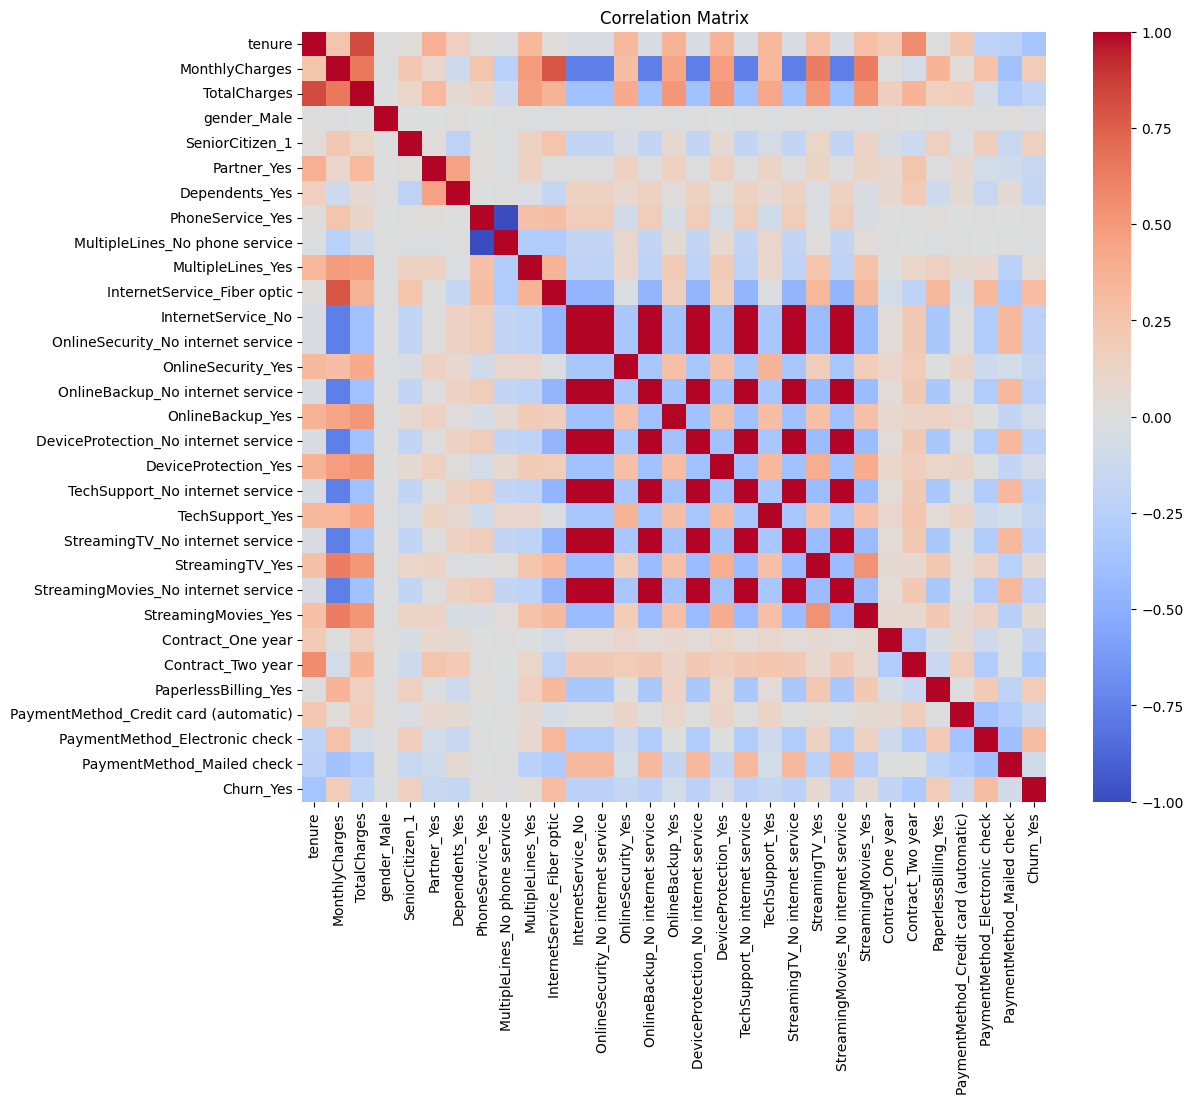

In [51]:
# Create a heatmap of the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Describe MonthlyCharges
monthly_charges_desc = df['MonthlyCharges'].describe()
monthly_charges_desc_text = f"Monthly Charges:\n{monthly_charges_desc}\n"

# Describe Tenure
tenure_desc = df['tenure'].describe()
tenure_desc_text = f"Tenure:\n{tenure_desc}\n"

# Print the descriptions
print(monthly_charges_desc_text)
print(tenure_desc_text)


In [ ]:
import numpy as np

# Compute the histogram of the Tenure variable
hist, bin_edges = np.histogram(df['tenure'], bins=10)

# Create a list to store the text descriptions
descriptions = []

# Loop through each bin in the histogram
for i in range(len(bin_edges) - 1):
    bin_start = bin_edges[i]
    bin_end = bin_edges[i + 1]
    bin_count = hist[i]
    
    # Create a text description for the bin
    description = f"Bin {i + 1}: {bin_start:.2f} - {bin_end:.2f} (Count: {bin_count})"
    
    # Add the description to the list
    descriptions.append(description)

# Print the text descriptions
for description in descriptions:
    print(description)


**Monthly Charges:**
- Monthly charges range from $18.25 to $118.75, with most customers falling between $35.50 and $89.85.
- The median monthly charge is $70.35, indicating the typical cost for customers.

**Tenure:**
- Customer tenure ranges from 0 to 72 months, with the majority of customers having a tenure between 9 and 55 months.
- The median tenure is 29 months, representing the typical length of time customers have been with the company.
